# House Value Prediction

*This project is intended to simulate how a ML model can predict the price of a house based on the following basic features of the house:*

`Variables`
1. `Lot Area` in square feet
2. `Built Area` in square feet
3. `Age of the house` in years (the last time it was built or renovated)
4. `Overall Condition`: rates the overall material and finish of the housefrom from 1 to 10
5. `Overall Quality`: rates the overall condition of the house from 1 to 10
6. `MSZoning`: The general zoning classification (only residential houses):
    - RL: Residential Low Density
    - RM: Residential Medium Density
    - RH: Residential High Density

**Performance of the Model**
The model has an error of 10% in the prediction of the price of the houses.


**Warning, the MVP only works for**
- Houses
- Normal Sale Condition or Partial Sale Condition which means it was a presale. (not foreclosure, not short sale, etc.)
- Residential houses (no commercial, no industrial, etc.)
- Warranty Convencional or New Home (no VA, no FHA, etc.)

------------

# *** Settings *** #
(do not change)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import catboost as cb
import shap

In [9]:
# load the model from disk
cbmodel = cb.CatBoostRegressor()
cbmodel.load_model('../models/catboost_model_no_log.cbm')

In [10]:
# predict
def predict(data, model):
    # data from dict to dataframe
    data = pd.DataFrame.from_dict(data, orient='index').T
    pred = model.predict(data)[0]
    # print with 2 decimals format, and in dollars
    print('Predicted price: ${:,.2f}'.format(pred))

# waterfall explanation
def waterfall(data, model):
    # data from dict to dataframe
    data = pd.DataFrame.from_dict(data, orient='index').T
    # predict
    pred = model.predict(data)
    # explainer of a catboost model
    explainer = shap.Explainer(model)
    # shap values
    shap_values = explainer(data)
    # plot waterfall with x axis in dollars
    shap.plots.waterfall(shap_values[0], max_display=10, show=False)
    # get current figure
    fig = plt.gcf()
    # set x axis in thousand dollars
    fig.axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x/1e+3))))
    # set title
    plt.title('Waterfall plot of predicted price (in thousand dollars)')
    # show 
    plt.show()
    

---------

# How To Use It

You only need to change the values of the variables in the first cell of the notebook and run the notebook. The values are:
1. `CurrentAge`: The age of the house in years (the last time it was built or renovated)
2. `GrLivArea`: The built area in square feet
3. `LotArea`: The lot area in square feet
4. `OverallCond`: The overall condition of the house from 1 to 10
5. `OverallQual`: The overall quality of the house from 1 to 10
6. `MSZoning`: The general zoning classification (only residential houses):
    - RL: Residential Low Density
    - RM: Residential Medium Density
    - RH: Residential High Density

In [11]:
# data
sample_data = {
    'CurrentAge': 12,
    'GrLivArea': 2060,
    'LotArea': 8755,
    'OverallCond': 5,
    'OverallQual': 7,
    'MSZoning': 'RL'
}


In [12]:
# predict
predict(sample_data, cbmodel)

Predicted price: $223,382.35


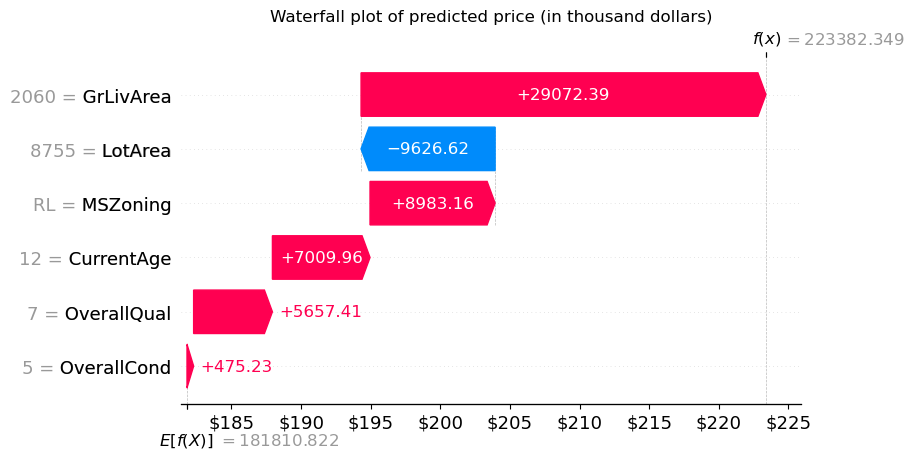

In [13]:
# understand the prediction
waterfall(sample_data, cbmodel)

The model predicts the price of $223,382 as follows:

1. The base value is $181.8K, which is the average price of the houses in the dataset.add
2. The OverallCond of 5 gives $.5K to the price.
3. The OverallQual of 7 gives $5.6K to the price.
4. The Current age of 12 years gives $7K to the price.
5. The Lot Area of 8755 sqft gives -$9.6K to the price, because it is smaller than the average Lot Area of 10,500 sqft.
6. The GrLivArea of 2060 sqft gives $29K to the price, because it is bigger than the average GrLivArea of 1,515 sqft.

Adding this terms, the model predicts a price of $223.4K, which is close to the real price of $214K.

----

# Try

In [ ]:
# data
data2 = {
    'CurrentAge': , # ADD YOUR DATA HERE
    'GrLivArea': , # ADD YOUR DATA HERE
    'LotArea': , # ADD YOUR DATA HERE
    'OverallCond': , # ADD YOUR DATA HERE
    'OverallQual': , # ADD YOUR DATA HERE
    'MSZoning': '' # ADD YOUR DATA HERE
}

# predict
predict(data2, cbmodel)

# understand the prediction
waterfall(data2, cbmodel)

In [17]:
# get all the packages used in this notebook
